# Predicting Housing Prices with Advanced Regression

### A Kaggle Competition

### 📃 The Problem

The goal of this project it to predict the sales price for each house in the provided data.

[**Competition Link**](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

### 👩‍💻 The Approach

My initial approach will be to:
- Understand the data (*what variables are in the data set?*)
- Identify any missing, incomplete or invalid data
- Visualise the data to get an understanding of the relationship between variables
- Idenitfy the most appropriate model to use to solve the problem (*predicting housing prices*)
- Train selected model
- Evaluate and Improve Model where required
- Prepare a version for deployment



### 📚 Libraries

In [96]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'sklearn'

### 🔠 The Data

In [11]:
api = KaggleApi()
api.authenticate()

In [19]:
api.competition_download_files('house-prices-advanced-regression-techniques')

In [21]:
zf = ZipFile('house-prices-advanced-regression-techniques.zip')
zf.extractall('data/')
zf.close()

In [22]:
os.remove('house-prices-advanced-regression-techniques.zip')

In [25]:
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')

In [26]:
print(test_data.shape)
print(train_data.shape)

(1459, 80)
(1460, 81)


In [35]:
print(f"There are {len(test_data.columns)-1} different features for us to explore and they are: {test_data.columns[1:]}")

There are 79 different features for us to explore and they are: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'G

In [39]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [40]:
test_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


#### First i will start by identifying outliers

to start i will seperate numerical data from categorical

Then i will use scipy.stats.zscore to identify outliers with a z-score greater than 3


In [51]:
numerical_data = test_data.select_dtypes(include=['number']).columns
cat_data = test_data.select_dtypes(exclude=['number']).columns

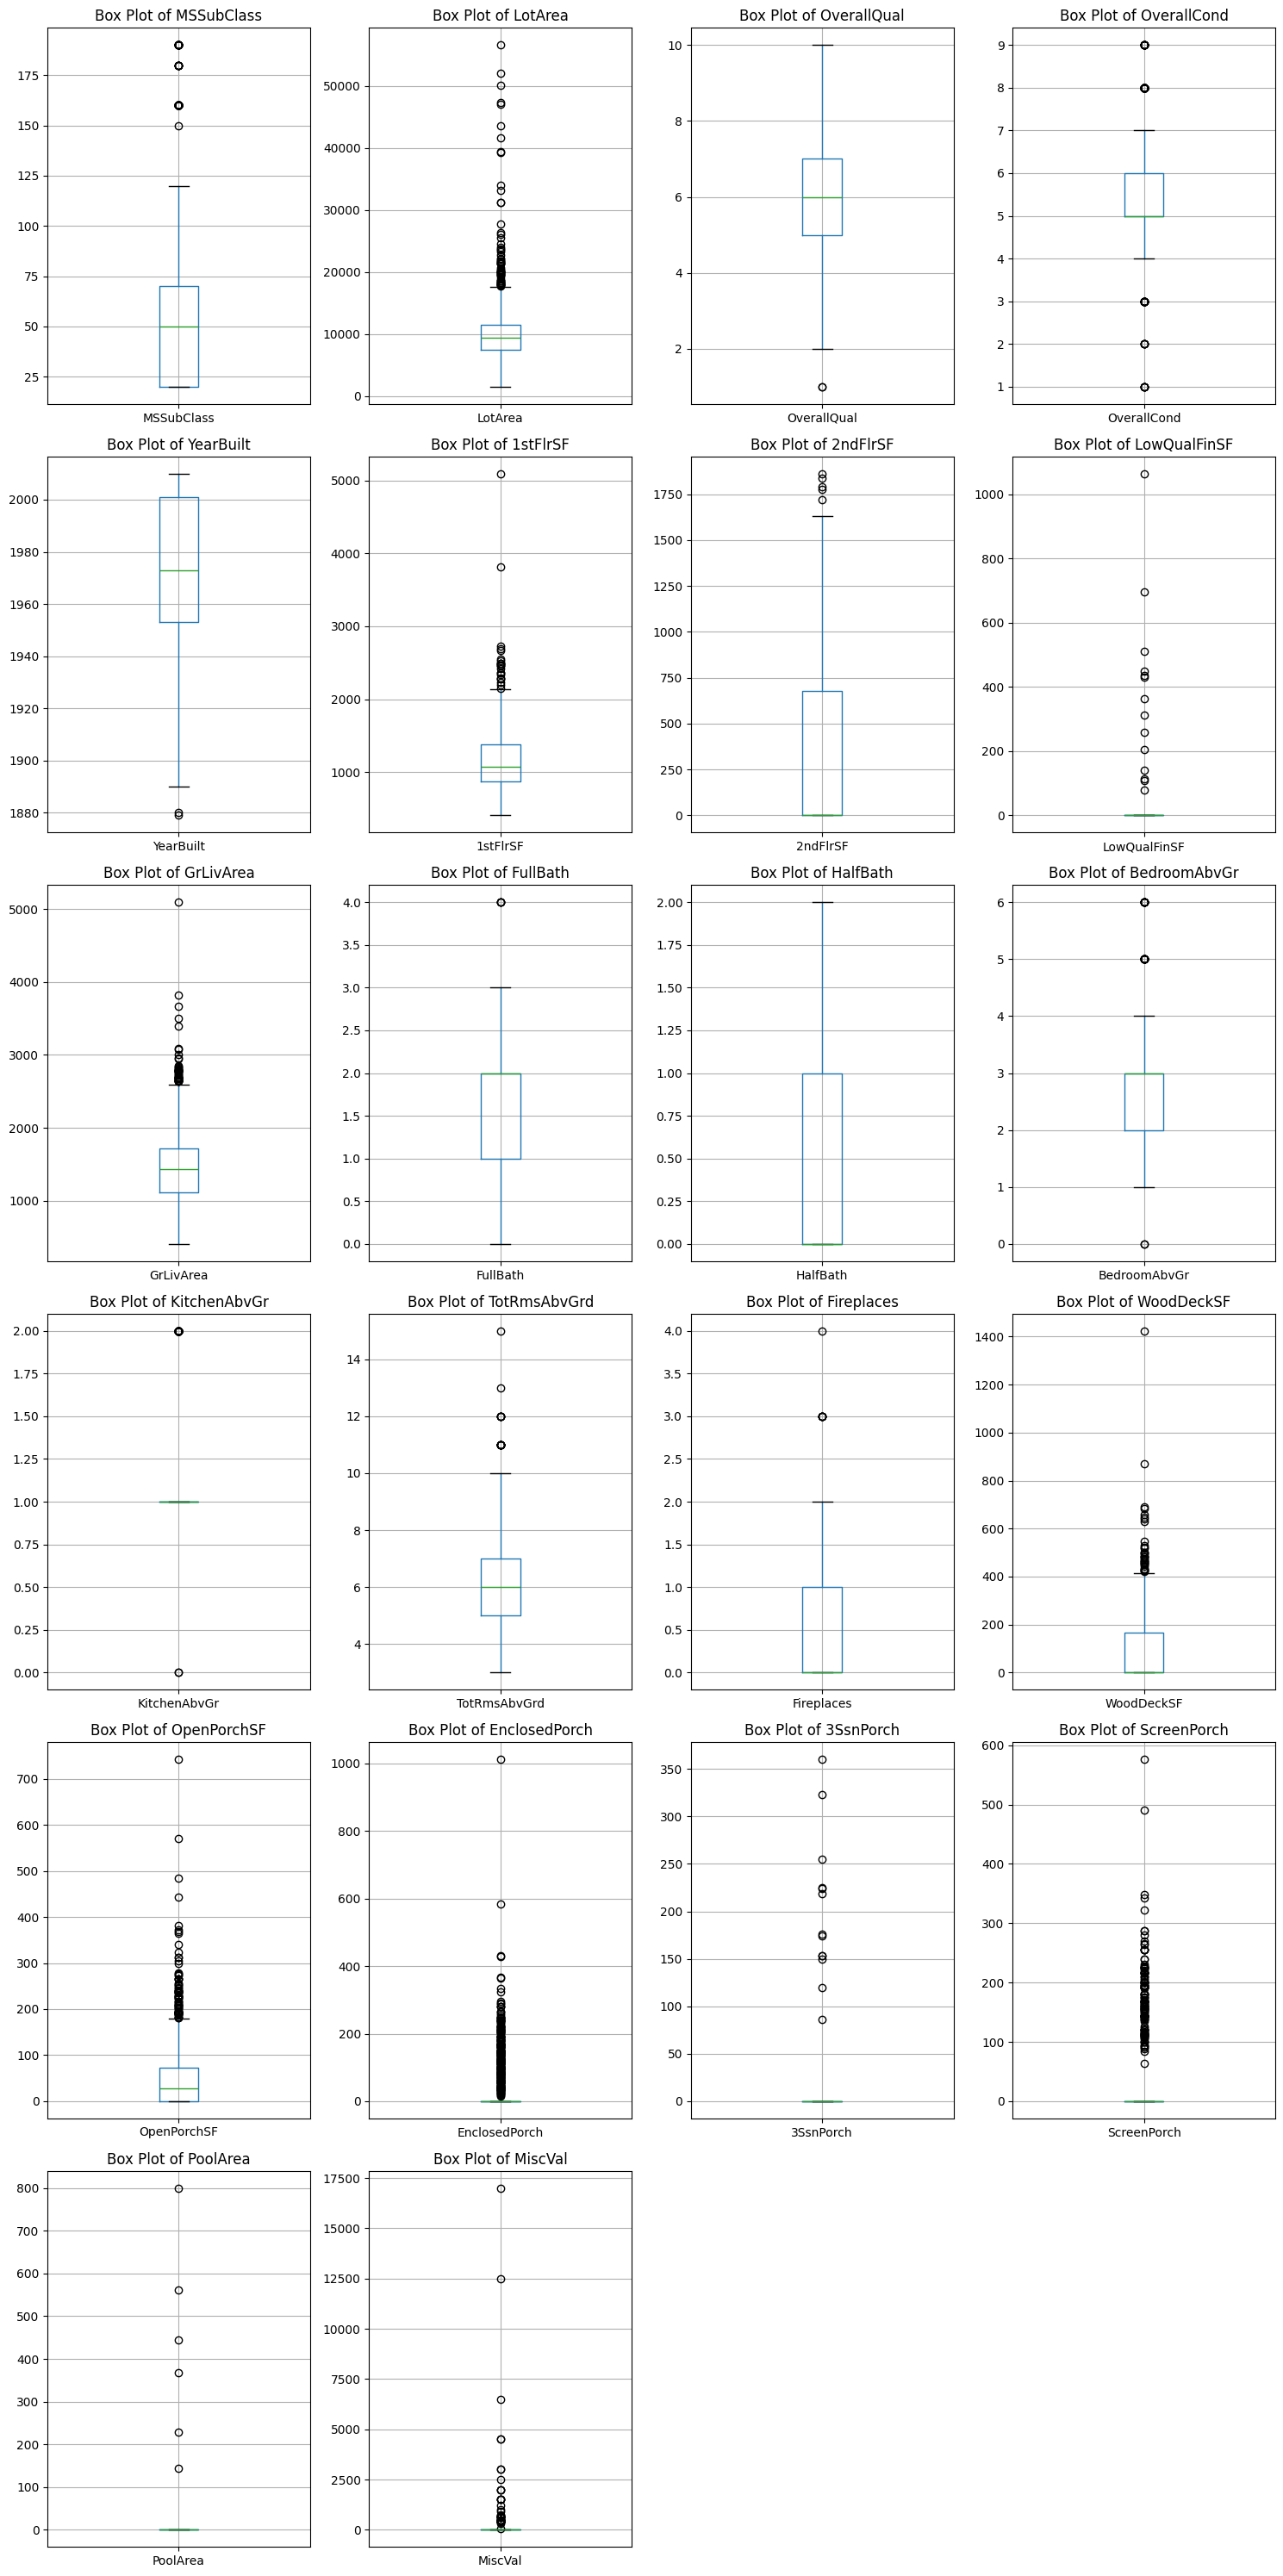

In [70]:

# First to get all numerical columns from the data that have outliers (abs(zscore)>=3)
outlier_cols =[]
for col in numerical_data:
    zscores = stats.zscore(test_data[col])
    if any(abs(x) >= 3 for x in zscores):
        outlier_cols.append(col)

# This code defines a grid to add box plots to
num_plots = len(outlier_cols)
num_cols =4
num_rows = (num_plots//num_cols)+1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

# this iterates through out outlier columns and plots them in a grid
for i, col in enumerate(outlier_cols):  
    ax = axes[i]
    test_data.boxplot(column=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')

# this loop compares the number of plots with the size of the grid and removes the empty plots
if num_plots % num_cols != 0:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

I was ideally hoping that seperating numeric and non-numeric data would split categorical data but looking at the data visualised it appears there are variables such as *MSSubClass* which are categorical. 

There is also attributes such as *PoolArea* which is interesting because a large majority of homes have no pool resulting in the significant outliers, this variable perhaps could be treated categorically as:
- no pool
- small pool
- medium pool
- large pool

It appears that the only way forward is to go through the *data_description.txt* and validate the data types into a list. I can't see another way with comparing this description file with the training data set, i know we can use K-means clustering here, however i think it would only be usefule on numeric variables as there is no meaning in the different values for *MSSubClass* and so similar identifiers could be grouped together.

I will categorise them into numerical and categorical data after reviewing this description file



In [82]:
cat_col= test_data[[
        'Id'
        ,'MSSubClass'
        ,'MSZoning'
        ,'Street'
        ,'Alley'
        ,'LotShape'
        ,'LandContour'
        ,'Utilities'
        ,'LotConfig'
        ,'LandSlope'
        ,'Neighborhood'
        ,'Condition1'
        ,'Condition2'
        ,'BldgType'
        ,'HouseStyle'
        ,'OverallQual'
        ,'OverallCond'
        ,'RoofStyle'
        ,'RoofMatl'
        ,'MasVnrType'
        ,'ExterQual'
        ,'ExterCond'
        ,'Foundation'
        ,'BsmtQual' #check na condition
        ,'BsmtCond'
        ,'BsmtExposure'
        ,'BsmtFinType1'
        ,'BsmtFinType2'
        ,'Heating'
        ,'HeatingQC'
        ,'CentralAir'
        ,'Electrical'
        ,'KitchenQual'
        ,'Functional'
        ,'FireplaceQu' #- check n/a
        ,'GarageType'
        ,'GarageFinish'
        ,'GarageQual'
        ,'GarageCond'
        ,'PavedDrive'
        ,'PoolQC'
        ,'Fence'
        ,'MiscFeature'
        ,'SaleType'
        ,'SaleCondition'
        ,'Exterior1st'
        ,'Exterior2nd'
       
        ]]

In [83]:
num_col= test_data[[
        'Id'
        ,'LotFrontage'
        ,'LotArea'
        ,'BsmtFinSF1'
        ,'BsmtFinSF2'
        ,'BsmtUnfSF' # basement might be able to be aggregated into one col
        ,'TotalBsmtSF'
        ,'1stFlrSF'
        ,'2ndFlrSF'
        ,'LowQualFinSF'
        ,'GrLivArea'
        ,'BsmtFullBath'
        ,'BsmtHalfBath'
        ,'FullBath'
        ,'HalfBath'
        ,'BedroomAbvGr'
        ,'KitchenAbvGr'
        ,'TotRmsAbvGrd'
        ,'GarageCars'
        ,'GarageArea'
        ,'WoodDeckSF'
        ,'OpenPorchSF'
        ,'EnclosedPorch'
        ,'3SsnPorch'
        ,'ScreenPorch'
        ,'PoolArea'
        ,'MiscVal'
        ,'LotFrontage'
        ,'YearBuilt'
        ,'YearRemodAdd'
        ,'GarageYrBlt'
        ,'YrSold'
        ,'MoSold'
        ,'MasVnrArea'
       

        
        ]]

In [85]:
print(f'The test df shape is {test_data.shape} and the categorical dataset is {cat_col.shape} and the numerical data set is {num_col.shape}, The extra column is the ID in both sets')

The test df shape is (1459, 80) and the categorical dataset is (1459, 47) and the numerical data set is (1459, 34), The extra column is the ID in both sets


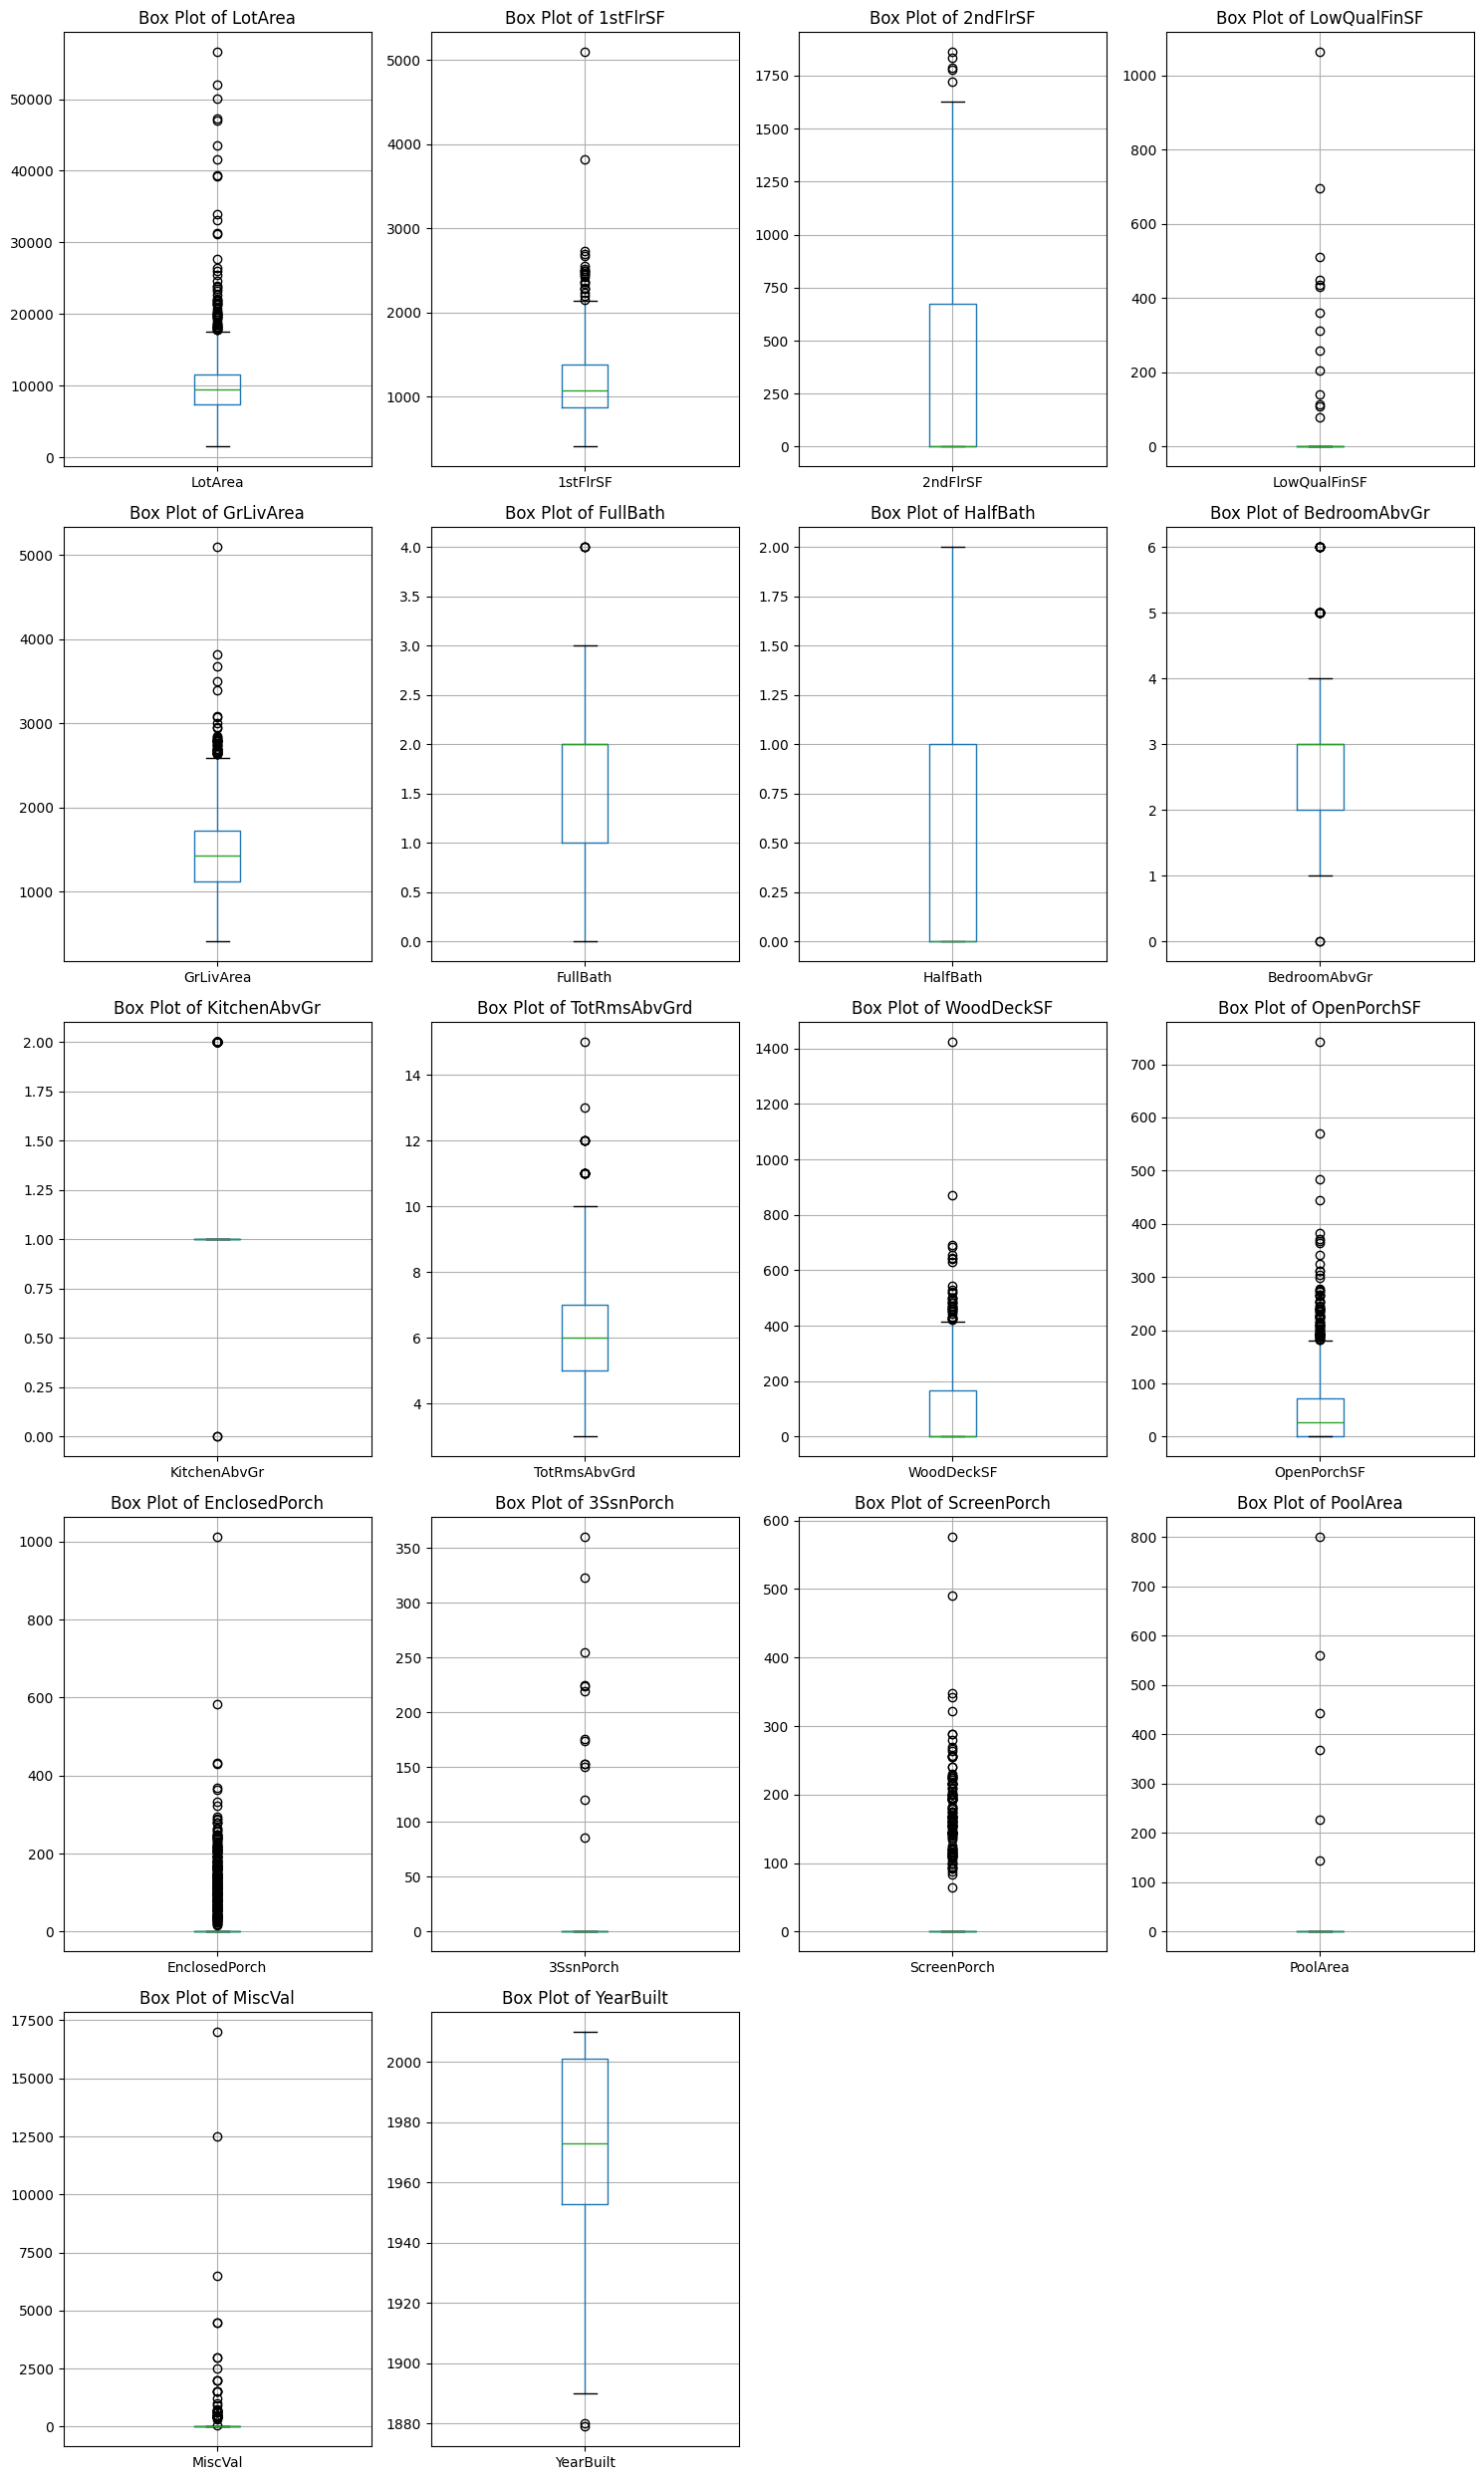

In [86]:
outlier_cols =[]
for col in num_col.columns:
    zscores = stats.zscore(test_data[col])
    if any(abs(x) >= 3 for x in zscores):
        outlier_cols.append(col)

# This code defines a grid to add box plots to
num_plots = len(outlier_cols)
num_cols =4
num_rows = (num_plots//num_cols)+1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

# this iterates through out outlier columns and plots them in a grid
for i, col in enumerate(outlier_cols):  
    ax = axes[i]
    test_data.boxplot(column=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')

# this loop compares the number of plots with the size of the grid and removes the empty plots
if num_plots % num_cols != 0:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

This is an improvement, however i beleive it would be optimal to apply categories to some of the numeric data, such a *poolArea*


Lets test this idea for *poolArea*

In [87]:

# create a DataFrame with a numerical column
data = pd.DataFrame({'Unit': [5, 15, 20, 25, 30, 40, 45, 50]})

# bin the numerical column into 3 groups
data['QcutBin'] = pd.qcut(data['Unit'], q=3)

# print the new DataFrame with the binned column
print(data)

   Unit           QcutBin
0     5   (4.999, 21.667]
1    15   (4.999, 21.667]
2    20   (4.999, 21.667]
3    25  (21.667, 36.667]
4    30  (21.667, 36.667]
5    40    (36.667, 50.0]
6    45    (36.667, 50.0]
7    50    (36.667, 50.0]
